In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download(
   "https://www.kaggle.com/c/dogs-vs-cats/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abdallatamer
Your Kaggle Key: ··········


100%|██████████| 812M/812M [00:21<00:00, 39.6MB/s]



Extracting archive ./dogs-vs-cats/dogs-vs-cats.zip to ./dogs-vs-cats


In [ ]:
import zipfile
zip_files = ['test1.zip', 'train.zip']

for zip_file in zip_files:
    with zipfile.ZipFile(f"/content/dogs-vs-cats/{zip_file}", "r") as z:
        z.extractall(".")
        print(f"{zip_file} unzipped")

test1.zip unzipped
train.zip unzipped


In [ ]:
import os
import pandas as pd
def list_files_in_directory(directory):
    return [os.path.join(directory, filename) for filename in os.listdir(directory) if os.path.isfile(os.path.join(directory, filename))]

train_image_paths = list_files_in_directory("/content/train")
test_image_paths = list_files_in_directory("/content/test1")

train_df = pd.DataFrame({'image_path': train_image_paths})
test_df = pd.DataFrame({'image_path': test_image_paths})

In [ ]:
print(train_df.head())
print(test_df.head())

                     image_path
0  /content/train/cat.11186.jpg
1   /content/train/cat.4871.jpg
2   /content/train/dog.1862.jpg
3   /content/train/dog.3097.jpg
4  /content/train/dog.11006.jpg
                 image_path
0   /content/test1/5094.jpg
1    /content/test1/706.jpg
2   /content/test1/4488.jpg
3   /content/test1/4608.jpg
4  /content/test1/11540.jpg


In [ ]:
TRAIN_DIR_PATH = './train'
file_names = os.listdir(TRAIN_DIR_PATH)
print('There are {} number of images in directory.'.format(len(file_names)))

There are 25000 number of images in directory.


In [ ]:
TRAIN_DIR_PATH = './test1'
file_names = os.listdir(TRAIN_DIR_PATH)
print('There are {} number of images in directory.'.format(len(file_names)))

There are 12500 number of images in directory.


In [ ]:
IMAGE_FOLDER_PATH = "./train"
FILE_NAMES = os.listdir(IMAGE_FOLDER_PATH)

In [ ]:
targets = list()
full_paths = list()
train_cats_dir = list()
train_dogs_dir = list()

for file_name in FILE_NAMES:
    target = file_name.split(".")[0]
    full_path = os.path.join(IMAGE_FOLDER_PATH, file_name)

    if(target == "dog"):
        train_dogs_dir.append(full_path)
    if(target == "cat"):
        train_cats_dir.append(full_path)

    full_paths.append(full_path)
    targets.append(target)

dataset = pd.DataFrame()
dataset['image_path'] = full_paths
dataset['target'] = targets

In [ ]:
train_cats_dir[:5]

['./train/cat.11186.jpg',
 './train/cat.4871.jpg',
 './train/cat.4715.jpg',
 './train/cat.818.jpg',
 './train/cat.2389.jpg']

In [ ]:
train_dogs_dir[:5]

['./train/dog.1862.jpg',
 './train/dog.3097.jpg',
 './train/dog.11006.jpg',
 './train/dog.7733.jpg',
 './train/dog.1602.jpg']

In [ ]:
dataset.head()

image_path target
0  ./train/cat.11186.jpg    cat
1   ./train/cat.4871.jpg    cat
2   ./train/dog.1862.jpg    dog
3   ./train/dog.3097.jpg    dog
4  ./train/dog.11006.jpg    dog

In [ ]:
len(dataset)

25000

In [ ]:
print("total data counts:", dataset['target'].count())
counts = dataset['target'].value_counts()
print(counts)

total data counts: 25000
target
cat    12500
dog    12500
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
def load_image_rgb(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

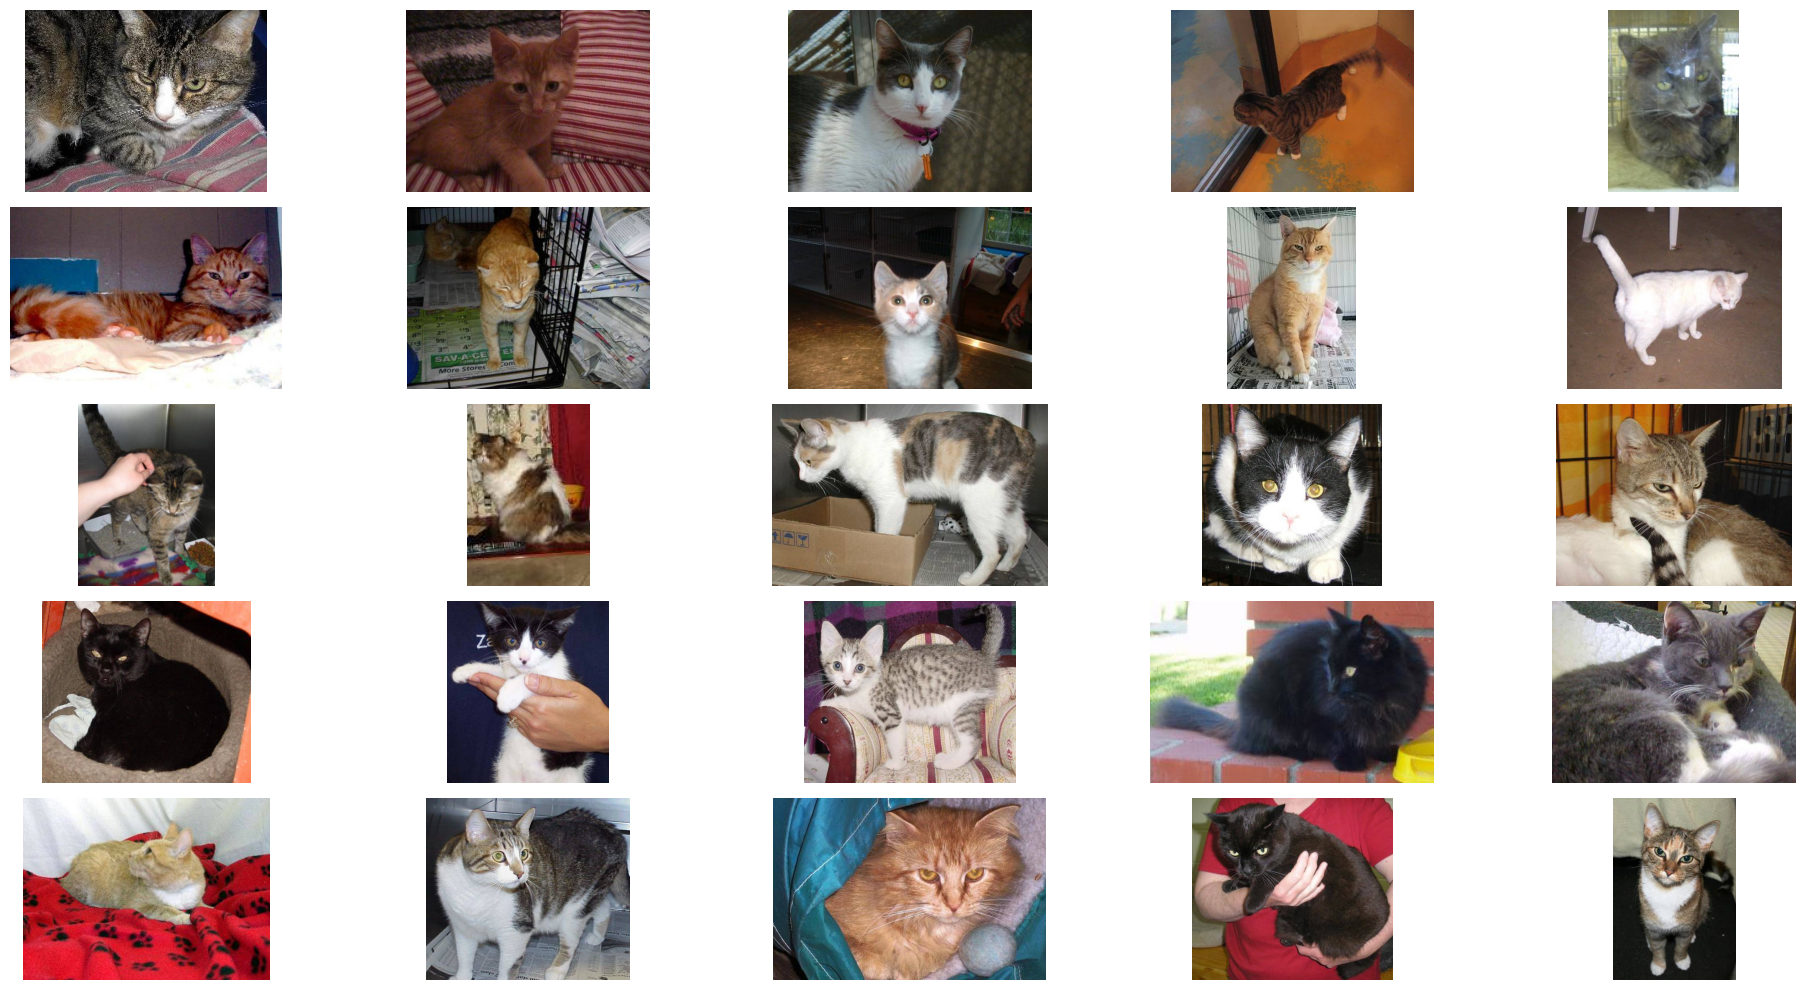

In [ ]:
rows = 5
cols = 5
axes = []
fig = plt.figure(figsize=(20, 10))
i = 0

for a in range(rows * cols):
    b = load_image_rgb(train_cats_dir[i])
    axes.append(fig.add_subplot(rows, cols, a + 1))
    plt.imshow(b)
    plt.axis('off')
    i += 1

fig.tight_layout()
plt.show()

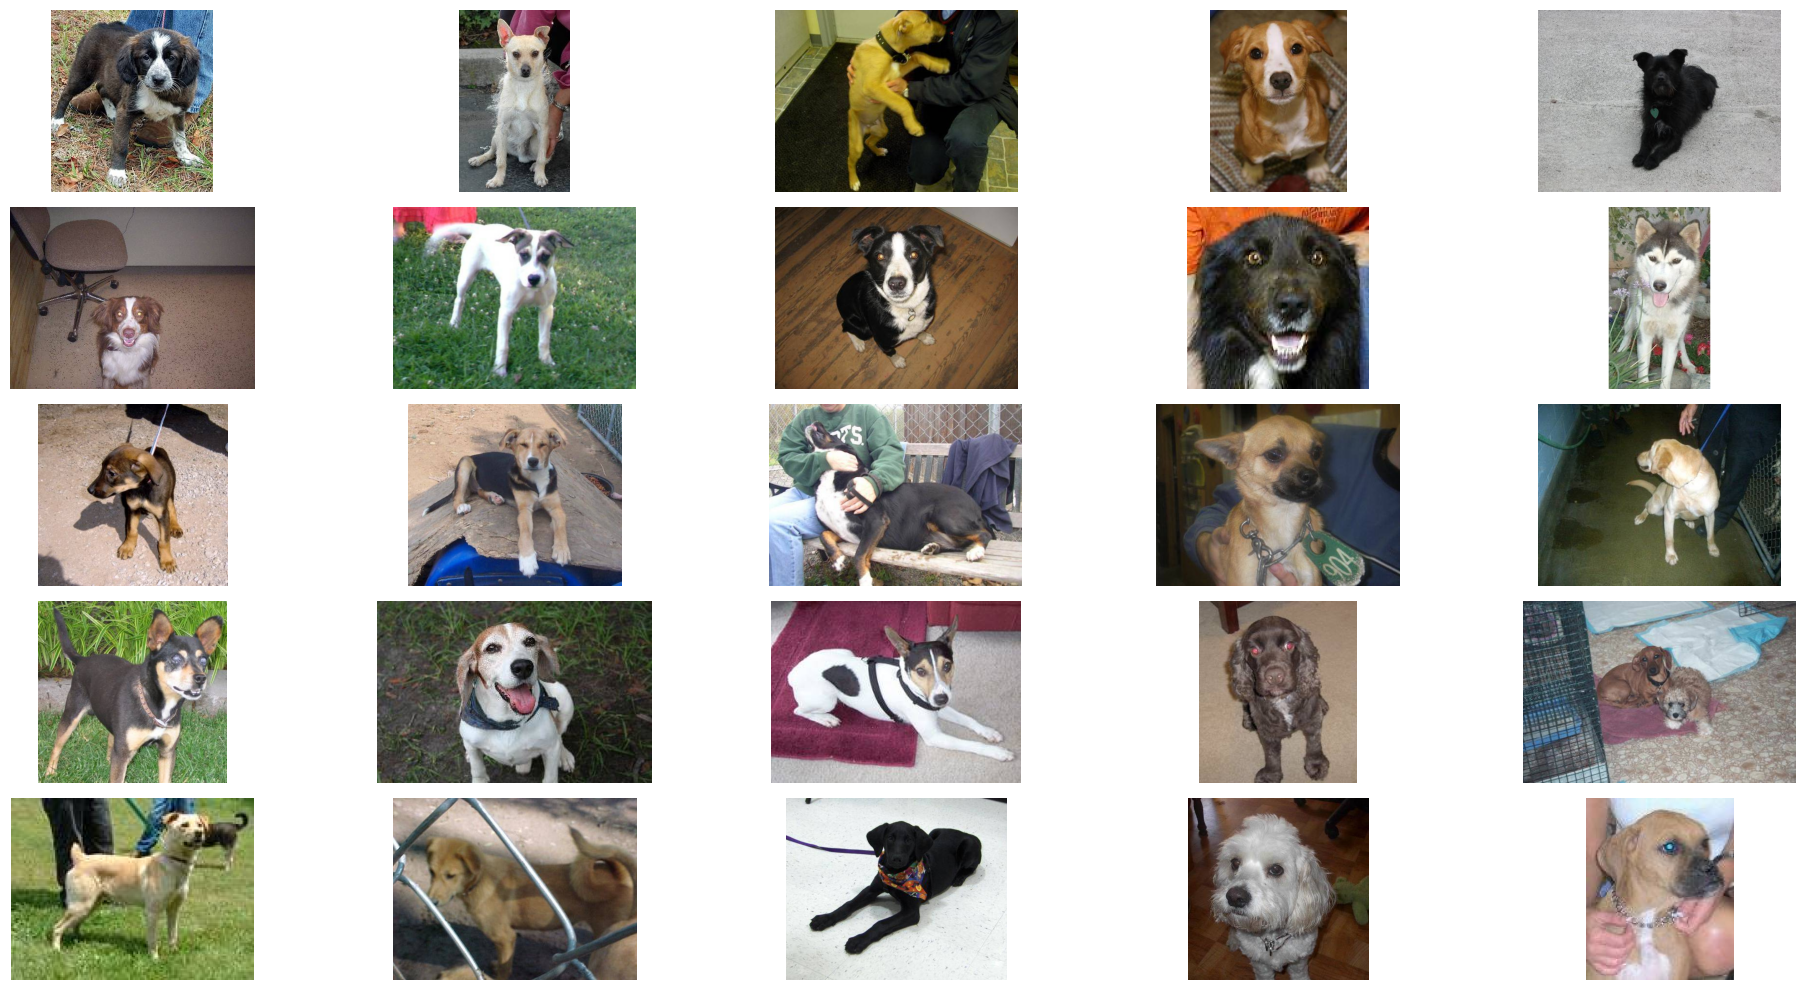

In [ ]:
rows = 5
cols = 5
axes = []
fig = plt.figure(figsize=(20, 10))
i = 0

for a in range(rows * cols):
    b = load_image_rgb(train_dogs_dir[i])
    axes.append(fig.add_subplot(rows, cols, a + 1))
    plt.imshow(b)
    plt.axis('off')
    i += 1

fig.tight_layout()
plt.show()

In [ ]:
def preprocess_image(image_path, size=(64, 64)):
    image = load_image_rgb(image_path)
    image_resized = cv2.resize(image, size)
    image_flattened = image_resized.flatten()
    return image_flattened

In [ ]:
X = []
y = []

for index, row in dataset.iterrows():
    image_path = row['image_path']
    target = row['target']

    image_features = preprocess_image(image_path)
    X.append(image_features)
    y.append(0 if target == 'cat' else 1)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
pca = PCA(n_components=100)
scaler = StandardScaler()
svm_rbf = SVC(kernel='rbf', random_state=42)

In [ ]:
pipeline = make_pipeline(scaler, pca, svm_rbf)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=100)), ('svc', SVC(random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['cat', 'dog']))

Accuracy: 0.6776
Classification Report:
               precision    recall  f1-score   support

         cat       0.67      0.68      0.67      2460
         dog       0.69      0.68      0.68      2540

    accuracy                           0.68      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.68      0.68      0.68      5000



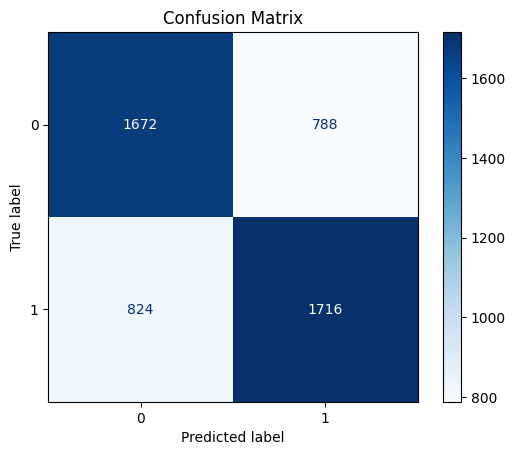

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()